In [1]:
import matplotlib.pyplot as plt
from IPython.display import Math, display
import numpy as np
import sympy as sp
from scipy import constants as const
from scipy.optimize import minimize_scalar
from scipy import sparse

#add relative path to backend
import sys
sys.path.append('../../clean_diag/backend')

import trap_units as si
from twod_trap import DoubleTweezer, TwoSiteLattice

# Trap parameters

In [36]:
### Erbium ###

initial_power = 100* si.uW
initial_waist = 1.1*si.uW
initial_distance = 1.266*si.um

trap: DoubleTweezer = DoubleTweezer(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer1 = initial_power,     #stationary
    power_tweezer2 = initial_power,     #transfer tweezer
    waist_tweezer1 = initial_waist,     #stationary
    waist_tweezer2 = initial_waist,     #transfer tweezer
    distance_tweezers = initial_distance,

    m = 168 * const.value("atomic mass constant"),
    mu_b = 6.982806* const.value("Bohr magneton"),
    a_s = 85* const.value("Bohr radius"),
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

### Calculate $E_r = h^2/8ma^2$ and depth of tweezers (single tweezer depth not accuarte if close together)

In [26]:
E_r = const.h**2/(8*trap.m*trap.distance_tweezers**2)

depth_tweezer1 = trap.a*2*trap.power_tweezer1/sp.pi/trap.waist_tweezer1**2
depth_tweezer2 = trap.a*2*trap.power_tweezer2/sp.pi/trap.waist_tweezer2**2

In [27]:
depth_tweezer1

2*P_t1*a/(pi*W_t1**2)

In [28]:
float(trap.subs(E_r))/const.h

4196.086090663433

### Match depth to Lauriane's paper:

In [29]:
power = trap.subs(
    sp.solve(
        depth_tweezer1/E_r - 15,
        trap.power_tweezer1,
    )[0]
).evalf()

display(
    Math(
        f"{sp.latex(trap.power_tweezer1)}\\left(V_1 = 15 E_r \\right)"
        f" = {power/si.uW:.2f} \\mathrm{{\\mu W}}"
    )
)

<IPython.core.display.Math object>

In [30]:
float(trap.subs(depth_tweezer1/E_r))

15.365855450757438

### Calculate trapping frequencies:

In [31]:
omega_z1 = sp.sqrt(4*trap.power_tweezer1*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer1**3
omega_z2 = sp.sqrt(4*trap.power_tweezer2*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer2**3

omega_r1 = sp.sqrt(2*trap.power_tweezer1*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer1**2
omega_r2 = sp.sqrt(2*trap.power_tweezer2*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer2**2

In [32]:
omega_r1

2*sqrt(2)*sqrt(P_t1)*sqrt(a)/(sqrt(pi)*W_t1**2*sqrt(m))

### Match trapping frequency to Lauriane's paper:

In [33]:
waist = trap.subs(
    sp.solve(
        omega_r1 - 2*np.pi *29.0,
        trap.waist_tweezer1,
    )[0]
).evalf()

display(
    Math(
        f"{sp.latex(trap.waist_tweezer1)}\\left(\\omega_x = 2\\pi \\cdot 29.0 \\right)"
        f" = {waist/si.um:.2f} \\mathrm{{\\mu m}}"
    )
)

<IPython.core.display.Math object>

In [34]:
float(trap.subs(omega_r1))/(2*np.pi)

320.25388559018154

## Analytically:

In [55]:
depth_in_Er = 15
trap_freq = 29.0 #Hz

waist_analytic = sp.sqrt(depth_in_Er /2)* const.h/trap.m/trap.distance_tweezers/(2*sp.pi*trap_freq)
power_analytic = (2*sp.pi*trap_freq)**2 *sp.pi*trap.m*waist_analytic**4/8/trap.a 

print(f"w_0 = {float(trap.subs(waist_analytic))/si.um:.2f}um")
print(f"P = {float(trap.subs(power_analytic))/si.uW:.2f}uW")

w_0 = 134.21um
P = 2110639.42uW


In [56]:
### Erbium ###

initial_power = float(trap.subs(power_analytic))
initial_waist = float(trap.subs(waist_analytic))
initial_distance = 0.266*si.um

trap: DoubleTweezer = DoubleTweezer(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer1 = initial_power,     #stationary
    power_tweezer2 = initial_power,     #transfer tweezer
    waist_tweezer1 = initial_waist,     #stationary
    waist_tweezer2 = initial_waist,     #transfer tweezer
    distance_tweezers = initial_distance,

    m = 168 * const.value("atomic mass constant"),
    mu_b = 6.982806* const.value("Bohr magneton"),
    a_s = 85* const.value("Bohr radius"),
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

In [57]:
E_r = const.h**2/(8*trap.m*trap.distance_tweezers**2)

depth_tweezer1 = trap.a*2*trap.power_tweezer1/sp.pi/trap.waist_tweezer1**2
depth_tweezer2 = trap.a*2*trap.power_tweezer2/sp.pi/trap.waist_tweezer2**2

float(trap.subs(depth_tweezer1/E_r))

15.000000000000009

In [58]:
omega_z1 = sp.sqrt(4*trap.power_tweezer1*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer1**3
omega_z2 = sp.sqrt(4*trap.power_tweezer2*trap.a/sp.pi**3/trap.m) * trap.wvl/trap.waist_tweezer2**3

omega_r1 = sp.sqrt(2*trap.power_tweezer1*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer1**2
omega_r2 = sp.sqrt(2*trap.power_tweezer2*trap.a/sp.pi/trap.m) * 2/trap.waist_tweezer2**2

float(trap.subs(omega_r1))/2/np.pi

29.00000000000001

## See how that looks:

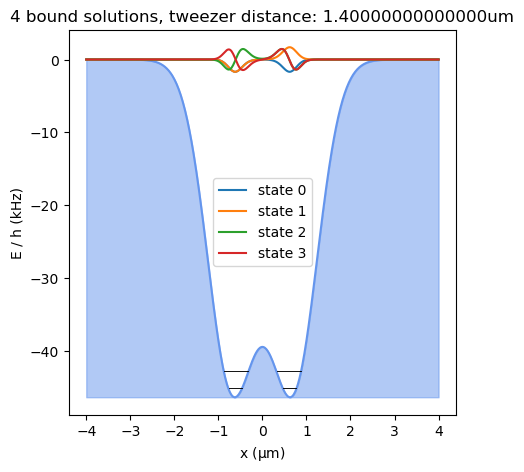

In [68]:
left_cutoff = -0.5*float(trap.subs(trap.distance_tweezers))-3*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
right_cutoff = 0.5*float(trap.subs(trap.distance_tweezers))+3*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])


# Solve the hamiltonian numerically in axial direction
energies, states, potential, coords = trap.nstationary_solution(
    trap.x, (left_cutoff, right_cutoff), 500, k=4
)

# States that are below the potential barrier
bound_states = energies < potential(left_cutoff)


z_np = np.linspace(left_cutoff, right_cutoff, num=500)
ax: plt.Axes
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(z_np / si.um, potential(z_np) / const.h / si.kHz,color="cornflowerblue" ,marker="None")
ax.set_title(f"{np.sum(bound_states)} bound solutions, tweezer distance: {trap.subs(trap.distance_tweezers)/si.um}um")
ax.set_xlabel(r"x ($\mathrm{\mu m}$)")
ax.set_ylabel(r"E / h (kHz)")
abs_min = np.min(potential(z_np))
ax.fill_between(
    z_np / si.um,
    potential(z_np) / const.h / si.kHz,
    abs_min / const.h / si.kHz,
    alpha=0.5,
    color="cornflowerblue"
)

count = 0
for i, bound in enumerate(bound_states):
    if not bound:
        continue
    energy = energies[i]
    state = states[i]
    ax.plot(
        z_np / si.um,
        np.where(
            (energy > potential(z_np)),
            energy / const.h / si.kHz,
            np.nan,
        ),
        c="k",
        lw=0.5,
        marker="None",
    )
    ax.plot(z_np/si.um, state *1e1, marker="None",label=f"state {count}")#, c="k")
    count += 1

plt.legend()
plt.show()

In [74]:
float(trap.subs(E_r))/const.h

185.24233721850484

## This probably doesn't work, since the depth is not accurate when d is small

# Let's properly estimate the depths and trapping frequencies

In [2]:
### Erbium ###

initial_power = 5600* si.uW
initial_waist = 22*si.uW
initial_distance = 22.01*si.um

trap: DoubleTweezer = DoubleTweezer(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer1 = initial_power,     #stationary
    power_tweezer2 = initial_power,     #transfer tweezer
    waist_tweezer1 = initial_waist,     #stationary
    waist_tweezer2 = initial_waist,     #transfer tweezer
    distance_tweezers = initial_distance,

    m = 168 * const.value("atomic mass constant"),
    mu_b = 6.982806* const.value("Bohr magneton"),
    a_s = 85* const.value("Bohr radius"),
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

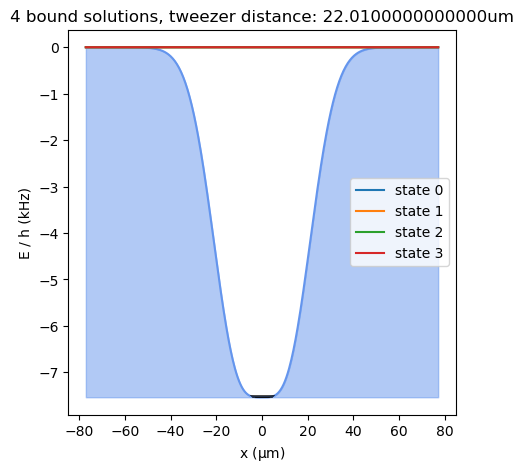

In [3]:
left_cutoff = -0.5*float(trap.subs(trap.distance_tweezers))-3*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])
right_cutoff = 0.5*float(trap.subs(trap.distance_tweezers))+3*np.max([float(trap.subs(trap.waist_tweezer1)),float(trap.subs(trap.waist_tweezer2))])


# Solve the hamiltonian numerically in axial direction
energies, states, potential, coords = trap.nstationary_solution(
    trap.x, (left_cutoff, right_cutoff), 500, k=4
)

# States that are below the potential barrier
bound_states = energies < potential(left_cutoff)


z_np = np.linspace(left_cutoff, right_cutoff, num=500)
ax: plt.Axes
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(z_np / si.um, potential(z_np) / const.h / si.kHz,color="cornflowerblue" ,marker="None")
ax.set_title(f"{np.sum(bound_states)} bound solutions, tweezer distance: {trap.subs(trap.distance_tweezers)/si.um}um")
ax.set_xlabel(r"x ($\mathrm{\mu m}$)")
ax.set_ylabel(r"E / h (kHz)")
abs_min = np.min(potential(z_np))
ax.fill_between(
    z_np / si.um,
    potential(z_np) / const.h / si.kHz,
    abs_min / const.h / si.kHz,
    alpha=0.5,
    color="cornflowerblue"
)

count = 0
for i, bound in enumerate(bound_states):
    if not bound:
        continue
    energy = energies[i]
    state = states[i]
    ax.plot(
        z_np / si.um,
        np.where(
            (energy > potential(z_np)),
            energy / const.h / si.kHz,
            np.nan,
        ),
        c="k",
        lw=0.5,
        marker="None",
    )
    ax.plot(z_np/si.um, state *1e-3, marker="None",label=f"state {count}")#, c="k")
    count += 1

plt.legend()
plt.show()

In [4]:
V = trap.subs(trap.get_potential(apply_zero_offset=False))
a = float(trap.subs(trap.distance_tweezers))

#find minima of potential
def V_func(x):
    return float(V.subs(trap.x,x).subs(trap.y,0).subs(trap.z,0))
x_right = minimize_scalar(V_func,bracket=[0,a/2]).x
x_left = minimize_scalar(V_func,bracket=[-a/2,0]).x

#catch case where both potentials have already merged
tunneling_dist = abs(x_right-x_left)
if tunneling_dist < 1e-15:
    raise Exception("potential has only one minmum")

#depts of both tweezers
V_1 = abs(V_func(x_left) - V_func(0))
V_2 = abs(V_func(x_right) - V_func(0))

#trapping frequencies through second derivative
V_prime = sp.diff(V, x)
V_double_prime = sp.diff(V_prime, x)

omega_x1 = float(trap.subs(sp.sqrt(V_double_prime.subs(trap.x,x_left).subs(trap.y,0).subs(trap.z,0)/trap.m)))
omega_x2 = float(trap.subs(sp.sqrt(V_double_prime.subs(trap.x,x_right).subs(trap.y,0).subs(trap.z,0)/trap.m)))

#recoil energy
E_r = const.h**2/(8*trap.m*trap.distance_tweezers**2)

#print results
print(f"depth: {V_2/float(trap.subs(E_r)):.2f} E_r")
print(f"trapping frequency: {omega_x1/2/np.pi:.2f} Hz")
print(f"tunneling distance: {tunneling_dist/si.nm:.2f} um")

NameError: name 'x' is not defined

### It seems that the desired parameters are not realisable with the tweezer potential

## Let's try to implement a lattice potential

In [2]:
### Erbium ###

initial_spacing = 0
initial_depth = 0


trap: TwoSiteLattice = TwoSiteLattice(

    lattice_depth = initial_depth,
    lattice_spacing = initial_spacing,


    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0*si.G/si.cm,
    grad_r=0,
    power_tweezer = 0,
    waist_tweezer = 0,

    m = 168 * const.value("atomic mass constant"),
    mu_b = 6.982806* const.value("Bohr magneton"),
    a_s = 137* const.value("Bohr radius"),
    a = 180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),
    wvl = 532 * si.nm,

    g = 0,
)

E_r = const.h**2/(2*trap.m*trap.lattice_spacing**2)

trap[trap.lattice_depth] = 15*E_r
#lattice spacing is double the actual distance between sites
trap[trap.lattice_spacing] = trap.wvl

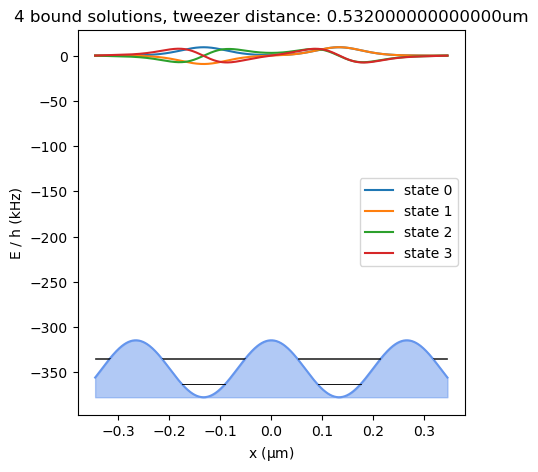

In [3]:
left_cutoff = -1.3*0.5*float(trap.subs(trap.lattice_spacing))
right_cutoff = 1.3*0.5*float(trap.subs(trap.lattice_spacing))


# Solve the hamiltonian numerically in axial direction
energies, states, potential, coords = trap.nstationary_solution(
    trap.x, (left_cutoff, right_cutoff), 500, k=4
)

# States that are below the potential barrier
#bound_states = energies < potential(left_cutoff)
bound_states = energies < np.inf

z_np = np.linspace(left_cutoff, right_cutoff, num=500)
ax: plt.Axes
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(z_np / si.um, potential(z_np) / const.h / si.kHz,color="cornflowerblue" ,marker="None")
ax.set_title(f"{np.sum(bound_states)} bound solutions, tweezer distance: {trap.subs(trap.lattice_spacing)/si.um}um")
ax.set_xlabel(r"x ($\mathrm{\mu m}$)")
ax.set_ylabel(r"E / h (kHz)")
abs_min = np.min(potential(z_np))
ax.fill_between(
    z_np / si.um,
    potential(z_np) / const.h / si.kHz,
    abs_min / const.h / si.kHz,
    alpha=0.5,
    color="cornflowerblue"
)

count = 0
for i, bound in enumerate(bound_states):
    if not bound:
        continue
    energy = energies[i]
    state = states[i]
    ax.plot(
        z_np / si.um,
        np.where(
            (energy > potential(z_np)),
            energy / const.h / si.kHz,
            np.nan,
        ),
        c="k",
        lw=0.5,
        marker="None",
    )
    ax.plot(z_np/si.um, state *1e2, marker="None",label=f"state {count}")#, c="k")
    count += 1

plt.legend()
plt.show()

In [4]:
V = trap.subs(trap.get_potential(apply_zero_offset=False))
a = float(trap.subs(trap.lattice_spacing))

#find minima of potential
def V_func(x):
    return float(V.subs({trap.x:x, trap.y:0, trap.z:0}))
#x_right = minimize_scalar(V_func,bracket=[1e-3*a,a/2],bounds=[0,a/2]).x
#x_left = minimize_scalar(V_func,bracket=[-a/2,-1e-3*a],bounds=[-a/2,0]).x
x_right = a/4
x_left = -a/4

#catch case where both potentials have already merged
tunneling_dist = abs(x_right-x_left)
if tunneling_dist < 1e-15:
    raise Exception("potential has only one minmum")

#depts of both tweezers
V_1 = abs(V_func(x_left) - V_func(0))
V_2 = abs(V_func(x_right) - V_func(0)) 

#trapping frequencies through second derivative
#trapping frequencies through second derivative
V_double_prime_x = sp.diff(V, trap.x, 2)
omega_x1 = float(trap.subs(sp.sqrt(V_double_prime_x.subs({trap.x:x_left, trap.y:0, trap.z:0})/trap.m)))
omega_x2 = float(trap.subs(sp.sqrt(V_double_prime_x.subs({trap.x:x_right, trap.y:0, trap.z:0})/trap.m)))

V_double_prime_y = sp.diff(V, trap.y, 2)
omega_y1 = float(trap.subs(sp.sqrt(V_double_prime_y.subs({trap.x:x_left, trap.y:0, trap.z:0})/trap.m)))
omega_y2 = float(trap.subs(sp.sqrt(V_double_prime_y.subs({trap.x:x_right, trap.y:0, trap.z:0})/trap.m)))

V_double_prime_z = sp.diff(V, trap.z, 2)
omega_z1 = float(trap.subs(sp.sqrt(V_double_prime_z.subs({trap.x:x_left, trap.y:0, trap.z:0})/trap.m)))
omega_z2 = float(trap.subs(sp.sqrt(V_double_prime_z.subs({trap.x:x_right, trap.y:0, trap.z:0})/trap.m)))

#recoil energy
E_r = const.h**2/(2*trap.m*trap.lattice_spacing**2)

#print results
print(f"depth: {V_2/float(trap.subs(E_r)):.2f} E_r")

print(f"trapping frequency x: {omega_x1/2/np.pi:.2f} Hz")
print(f"trapping frequency y: {omega_y1/2/np.pi:.2f} Hz")
print(f"trapping frequency z: {omega_z1/2/np.pi:.2f} Hz")

print(f"aspect ratio: {omega_x1/omega_z1:.2f}")

print(f"tunneling distance: {tunneling_dist/si.nm:.2f} um")

depth: 15.00 E_r
trapping frequency x: 32502.74 Hz
trapping frequency y: 32502.74 Hz
trapping frequency z: 32502.74 Hz
aspect ratio: 1.00
tunneling distance: 266.00 um


### Now do diagonalisation for this potential:

In [5]:
n_grid_1D = 50

n_pot_steps = [n_grid_1D,n_grid_1D,n_grid_1D]
n_levels = 8

left_cutoff = -0.5*float(trap.subs(trap.lattice_spacing))*1.3
right_cutoff = 0.5*float(trap.subs(trap.lattice_spacing))*1.3
back_cutoff = -0.25*float(trap.subs(trap.lattice_spacing))*1.3
front_cutoff = 0.25*float(trap.subs(trap.lattice_spacing))*1.3
bottom_cutoff = -0.5*float(trap.subs(trap.lattice_spacing))*1.7
top_cutoff = 0.5*float(trap.subs(trap.lattice_spacing))*1.7

extend = [(left_cutoff,right_cutoff),
          (back_cutoff,front_cutoff),
          (bottom_cutoff,top_cutoff)]


# Solve the hamiltonian numerically
energies, states, potential, coords = trap.nstationary_solution(
        [trap.x,trap.y,trap.z], extend, n_pot_steps, k=n_levels,
        method="matrix_free", export=True)


x = coords[trap.x]
y = coords[trap.y]
z = coords[trap.z]
x3D,y3D,z3D = np.meshgrid(coords[trap.x],coords[trap.y],coords[trap.z],indexing="ij")
pot = potential(x3D,y3D,z3D)


files saved with ...._2025-03-26_15-58-59


In [6]:
from boson_helpers import *

________________________________________________________________
d = 266.00nm


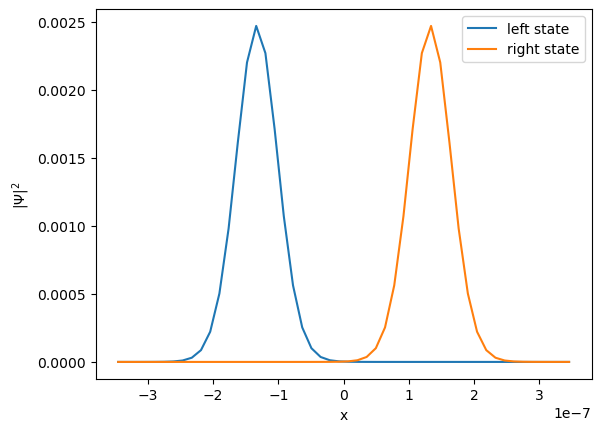

J = 27.481287 Hz
U_s = 2607.617 Hz


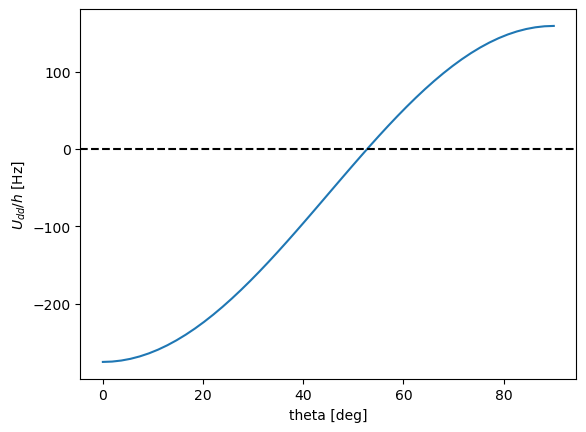

In [7]:
for i in range(25,26):

    trap, func_ham, res =  import_results(i)

    print("________________________________________________________________")
    print(f"d = {float(trap.subs(trap.lattice_spacing)/2) /si.nm :.2f}nm")

    GS_left, GS_right = get_localised_GS(res["states"][0], res["states"][1])
    
    plt.plot(res["x"],np.abs(GS_left[:,int(res["size"][1]/2),int(res["size"][2]/2)])**2, label="left state")
    plt.plot(res["x"],np.abs(GS_right[:,int(res["size"][1]/2),int(res["size"][2]/2)])**2, label="right state")

    plt.xlabel("x")
    plt.ylabel(r"$|\Psi|^2$")
    plt.legend()
    plt.show()

    J, U_s, U_dds, angles, V_lrs = analyse_diagonalisation(i)

    print(f"J = {J/const.h :3f} Hz")
    print(f"U_s = {U_s/const.h :.3f} Hz")

    plt.plot(np.rad2deg(angles), U_dds/const.h)

    plt.axhline(0,color="black",ls="--")

    plt.xlabel("theta [deg]")
    plt.ylabel(r"$U_{dd} / h$ [Hz]")
    plt.show()

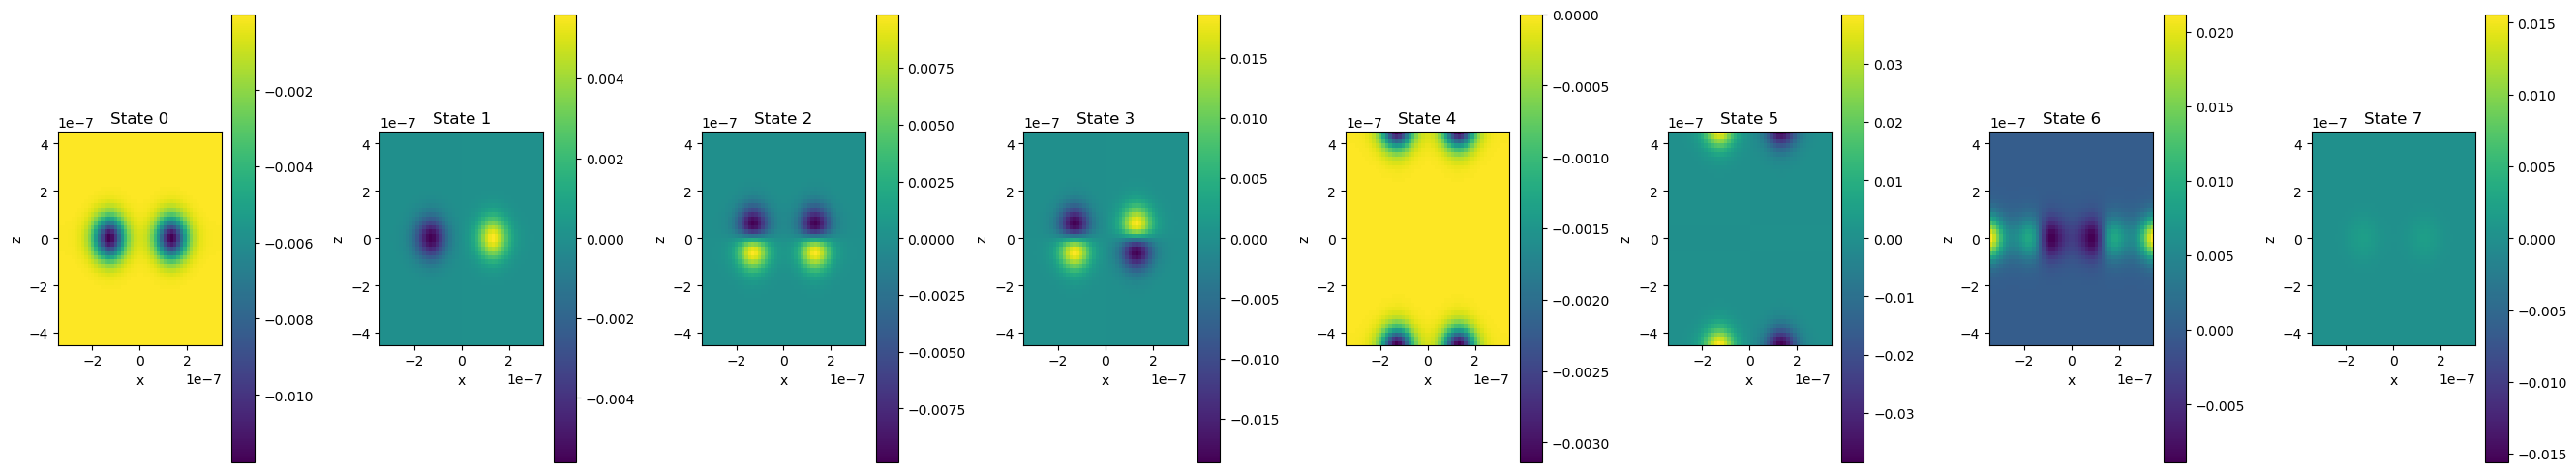

In [8]:
n_states = 8

states_plot = res["states"].real
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number, :, int(res["size"][1]/2), :].T,
                   extent=[*res["extend"][0], *res["extend"][2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


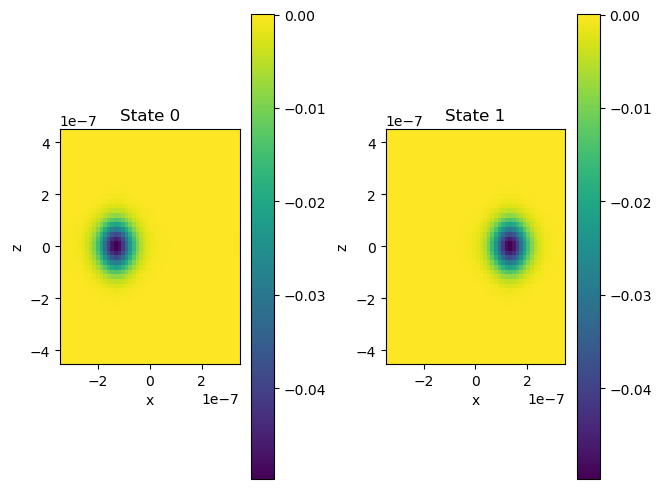

In [9]:
n_states = 2

states_plot = [GS_left.real, GS_right.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, int(res["size"][1]/2), :].T,
                   extent=[*res["extend"][0], *res["extend"][2]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

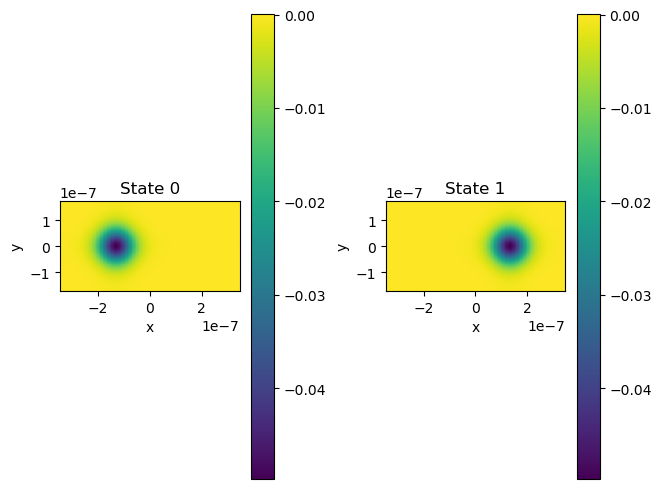

In [10]:
n_states = 2

states_plot = [GS_left.real, GS_right.real]
#states_plot = np.angle(states)
#states_plot = states.imag
#states_plot = np.abs(states)**2

# Create a 1xn_states grid of subplots (1 row, n_states columns)
fig, axes = plt.subplots(1, n_states, figsize=(20/6*n_states, 5))  # Adjust the size as needed

# Loop over the state numbers from 0 to n_states-1
for state_number, ax in zip(range(n_states), axes):
    # Slice through the y-direction and rotate the x-z plane (by swapping x and z)
    im = ax.imshow(states_plot[state_number][:, :, int(res["size"][2]/2)].T,
                   extent=[*res["extend"][0], *res["extend"][1]], origin="lower",
                   vmin=np.min(states_plot[state_number]), vmax=np.max(states_plot[state_number]))

    # Set labels for each subplot
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"State {state_number}")
    fig.colorbar(im, ax=ax)  

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()